In [14]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from scipy import stats

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [15]:
df = pd.read_excel('CA_Offenses_by_city_2013.xls', skip_rows=[0, 1, 2, 3], header=4, nrows=462)

In [16]:
df.rename(columns={df.columns[10]: "Larceny"}, inplace=True)
df.rename(columns={df.columns[11]: "Auto"}, inplace=True)
df.rename(columns={df.columns[8]: "Property crime"}, inplace=True)
df.fillna(0)
df.drop(df.columns[[4]], axis=1, inplace=True)
df['City'] = df['City'].astype(str)

In [17]:
city = pd.get_dummies(df.City)
df.drop(['City'], inplace=True, axis=1)
df_merge = pd.concat([df, city], axis=1)
df_merge.drop(df_merge.columns[3], axis=1, inplace=True)
df_merge['Larceny'] = pd.to_numeric(df_merge['Larceny'])
#df_merge.loc[df_merge.Murder1 > 0, 'Murder1'] = 1
#df_merge.loc[df_merge.Robbery > 0, 'Robbery'] = 1

In [18]:
df['Population**2'] = df['Population']**2

In [19]:
# Instantiate and fit our model.
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['Property crime'].values.reshape(-1, 1)
X = df[['Population','Population**2','Larceny', 'Auto']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 1.72822974e-03 -1.95093174e-10  1.07713929e+00  1.51947880e+00]]

Intercept: 
 [55.58128267]

R-squared:
0.9980677277384818


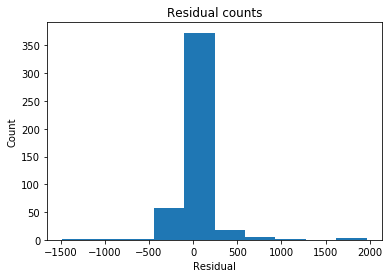

In [20]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = df['Property crime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

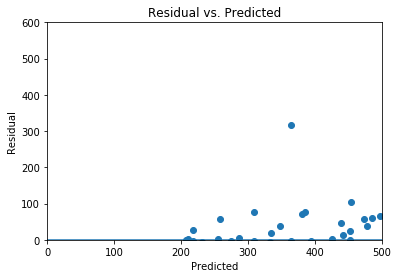

In [21]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.xlim(0,500)
plt.ylim(0,600)
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [22]:
X_trans = X[['Population','Population**2','Larceny', 'Auto']].values
X_trans = X_trans*0.5
predicted_trans = regr.predict(X_trans).ravel()
actual = df['Property crime']

# Calculate the error, also called the residual.
residual_trans = actual - predicted_trans

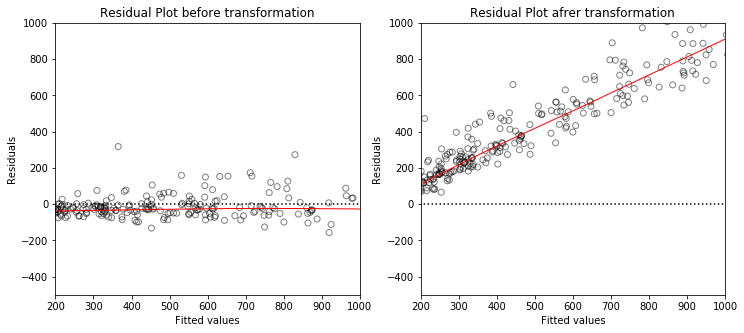

In [23]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.set_xlim(left=200, right=1000)
ax1.set_ylim(bottom=-500, top=1000)
ax2.set_xlim(left=200, right=1000)
ax2.set_ylim(bottom=-500, top=1000)
# Left plot
sns.regplot(predicted, residual, lowess=True, 
            ax=ax1, line_kws={'color':'r', 'lw':1},
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax1.hlines(0,xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dotted')
ax1.set_title('Residual Plot before transformation')

# Right plot
sns.regplot(predicted_trans, residual_trans, lowess=True,
            line_kws={'color':'r', 'lw':1}, ax=ax2,
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax2.hlines(0,xmin=ax2.xaxis.get_data_interval()[0],
           xmax=ax2.xaxis.get_data_interval()[1], linestyles='dotted')
ax2.set_title('Residual Plot afrer transformation')
for ax in fig.axes:
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')